In [1]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
stable_diffusion_model_id = "runwayml/stable-diffusion-v1-5"

def dummy(images, **kwargs):
    return images, False

def display_images(pipe):
    for i in range(len(pipe[0])):
        image = pipe.images[i]
        display(image)

pipe = StableDiffusionPipeline.from_pretrained(
    stable_diffusion_model_id, 
    torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")
pipe.enable_xformers_memory_efficient_attention()
pipe.safety_checker = dummy # Warning: enables NSFW images

A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [16]:
def get_pic(prompt, inference = 50, guidance_scale = 7.5, num_images_per_prompt = 1, seed = 1):
    """
    Creates an image using stable diffusion pipeline
    Parameters:
        prompt: string of the prompt
        inference: number of inference step, around 50 for a high quality image
        guidance scale: a way to increase the adherence to the conditional signal that guides the generation (text, in this case) as well as overall sample quality
    Returns:
        output: stable diffusion pipeline output
    """
    generator_list = []
    for i in range(num_images_per_prompt):
        generator_list.append(torch.Generator("cuda").manual_seed(seed + i))

    return pipe(
        prompt,
        negative_prompt = "tiling low quality pixelated blurry watermark cropped cut off draft",
        num_inference_steps = inference,
        guidance_scale = guidance_scale,
        num_images_per_prompt = num_images_per_prompt,
        generator = generator_list
    )

  0%|          | 0/150 [00:00<?, ?it/s]

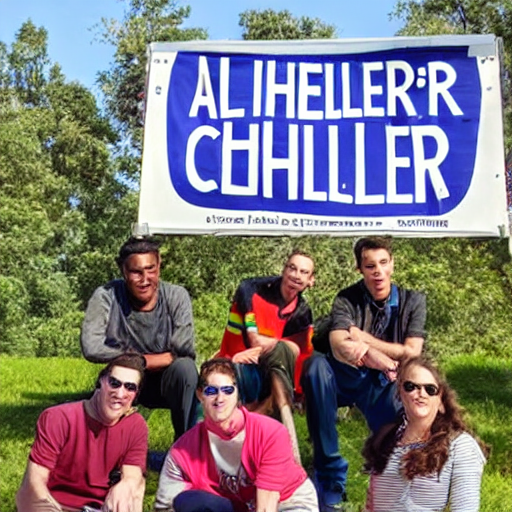

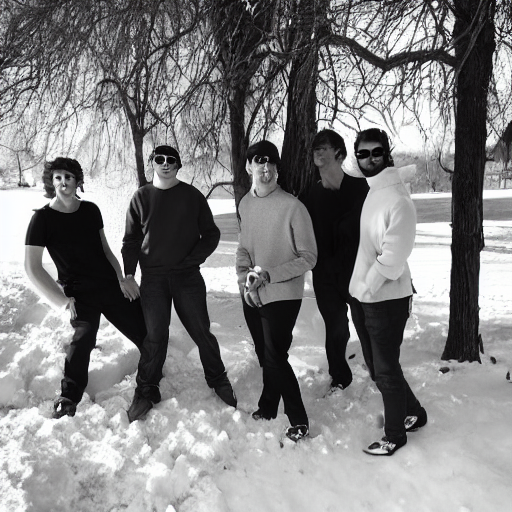

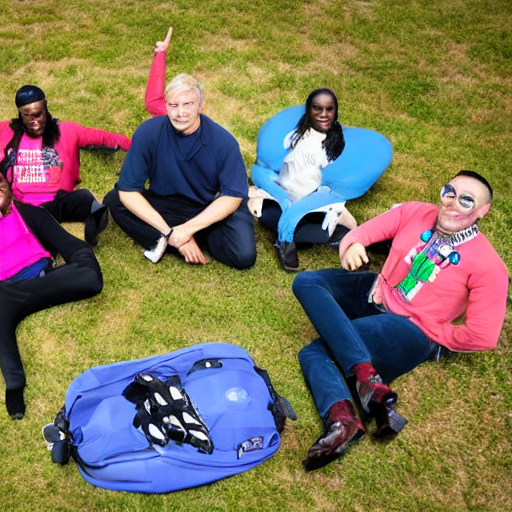

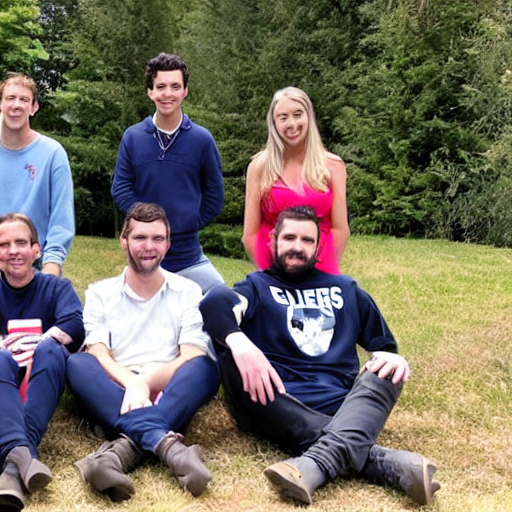

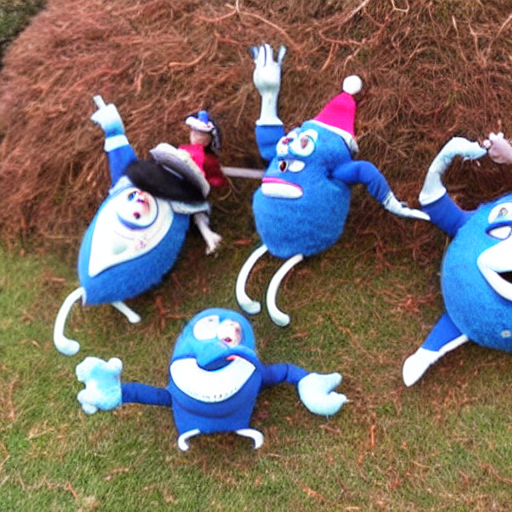

In [19]:
image = get_pic("a bunch of chillers chilling", inference = 150, num_images_per_prompt = 5, seed = 1298)
display_images(image)